In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

1.

In [ ]:
def componentes_velocidad(theta,v0):
  rad = (theta * np.pi) / 180
  v0_x = v0 * np.cos(rad)
  v0_y = v0 * np.sin(rad)
  return v0_x, v0_y

def rad(theta):
  return (theta * np.pi) / 180

In [ ]:
def alcance_maximo(R,radian,v0_x,v0_y,b,g):
  return ((g / b) + v0_y) * (R / v0_x) + (g / (b ** 2)) * np.log(1 - ((R * b) / v0_x))

2.

In [ ]:
radian = rad(45)
v0_x, v0_y = componentes_velocidad(45,55)
b = 0.005
g = 9.8
R = sc.optimize.newton(alcance_maximo,200.0,args = (radian,v0_x,v0_y,b,g))
print(f'El alcance máximo es: {R} metros')

El alcance máximo es: 300.69207669319275 metros


3.

In [ ]:
R_validado = sc.optimize.bisect(alcance_maximo,290,310,args = (radian,v0_x,v0_y,b,g))
print(f'El alcance máximo calculado con  bisección es: {R_validado} metros')

El alcance máximo calculado con  bisección es: 300.69207669317507 metros


In [ ]:
def tiempo_vuelo(b,R,v0_x):
  return -(1 / b) * np.log(1 - ((R * b) / v0_x))

vuelito = tiempo_vuelo(b,R,v0_x)
print(f'El tiempo de vuelo es: {vuelito} segundos')

El tiempo de vuelo es: 7.885101833164272 segundos


4.

In [ ]:
def posicion_x(v0_x,b,t):
  return (v0_x / b) * (1 - np.exp(-b * t))

def posicion_y(v0_y,b,g,t):
  return (1 / b) * ((g / b) + v0_y) * (1 - np.exp(-b * t)) - ((g / b) * t)

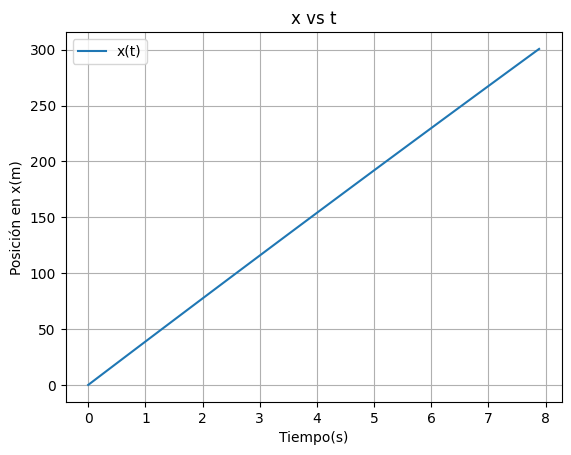

In [ ]:
#Grafica x vs t
t = np.linspace(0,vuelito,100)
sol_pos_x = np.zeros(len(t))
sol_pos_y = np.zeros(len(t))
#Valores de tiempo que varian
for i in range(len(t)):
  sol_pos_x[i] = posicion_x(v0_x,b,t[i])
  sol_pos_y[i] = posicion_y(v0_y,b,g,t[i])

#Graficacion
plt.plot(t,sol_pos_x,label='x(t)')
plt.xlabel('Tiempo(s)')
plt.ylabel('Posición en x(m)')
plt.title(('x vs t'))
plt.grid()
plt.legend()

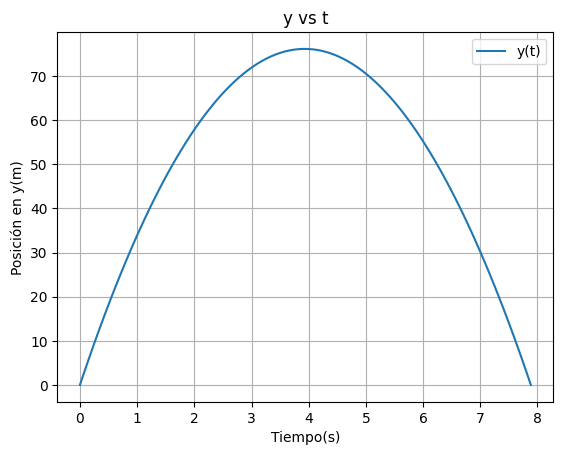

In [ ]:
#Grafica de y vs t
plt.plot(t,sol_pos_y,label='y(t)')
plt.xlabel('Tiempo(s)')
plt.ylabel('Posición en y(m)')
plt.title(('y vs t'))
plt.grid()
plt.legend()

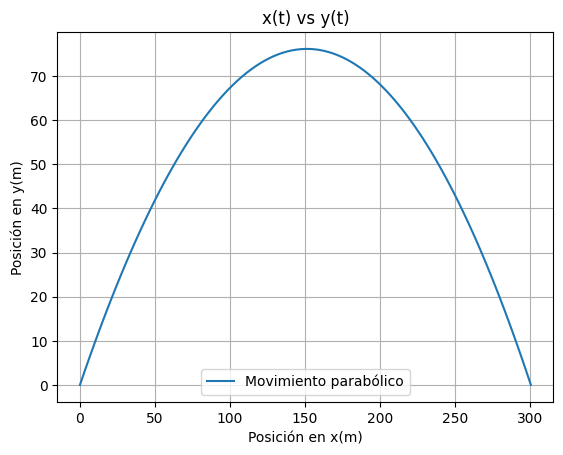

In [ ]:
#Grafica de x(t) vs y(t)
plt.plot(sol_pos_x,sol_pos_y,label='Movimiento parabólico')
plt.xlabel('Posición en x(m)')
plt.ylabel('Posición en y(m)')
plt.title(('x(t) vs y(t)'))
plt.grid()
plt.legend()

5.

In [ ]:
theta_grados = np.arange(0, 95, 5)
theta__radianes = np.arange(0,(np.pi * 95) / 180, (np.pi * 5) / 180)
alcances = np.zeros(len(theta__radianes))
new_v0_x = np.zeros(len(theta__radianes))
new_v0_y = np.zeros(len(theta__radianes))
b_new = 0.009
#Las velocidades en componentes para cada ángulo
alcances[0] = 0.0
alcances[len(theta__radianes) - 1] = 0.0
for i in range(len(theta__radianes)):

  new_v0_x[i], new_v0_y[i] = componentes_velocidad(theta_grados[i],40)

#Calculando el alcance para cada ángulo
for i in range(1, len(theta__radianes) - 1):

  alcances[i] = sc.optimize.bisect(alcance_maximo,26.,200.,args = (theta__radianes[i],new_v0_x[i],new_v0_y[i],b_new,g))
alcances

array([  0.        ,  28.23014829,  55.36860162,  80.60916747,
       103.21229431, 122.52570349, 138.00196718, 149.21265322,
       155.85877309, 157.77738133, 154.94428206, 147.47289663,
       135.60943641, 119.72460416, 100.3021167 ,  77.92440046,
        53.25586042,  27.02416248,   0.        ])

In [ ]:
vuelito_new = np.zeros(len(alcances))
#Determinando los tiempos de vuelo
for i in range(len(alcances)):

  vuelito_new[i] = tiempo_vuelo(b_new,alcances[i],new_v0_x[i])

print(f'Los tiempos de vuelo para cada ángulo son:')
for i in range(len(vuelito_new)):
  print(f'{theta_grados[i]} - {vuelito_new[i]}\n')

Los tiempos de vuelo para cada ángulo son:
0 - -0.0

5 - 0.7107177718916662

10 - 1.414534789321191

15 - 2.106154739614053

20 - 2.7804053104877595

25 - 3.4322745123333096

30 - 4.056944997531032

35 - 4.6498262437013445

40 - 5.20658449819256

45 - 5.723170407732553

50 - 6.195844279922188

55 - 6.621198942097218

60 - 6.99618017826698

65 - 7.318104736488865

70 - 7.584675907521517

75 - 7.7939966812561154

80 - 7.944580490567791

85 - 8.03535955331617

90 - -0.0



6.

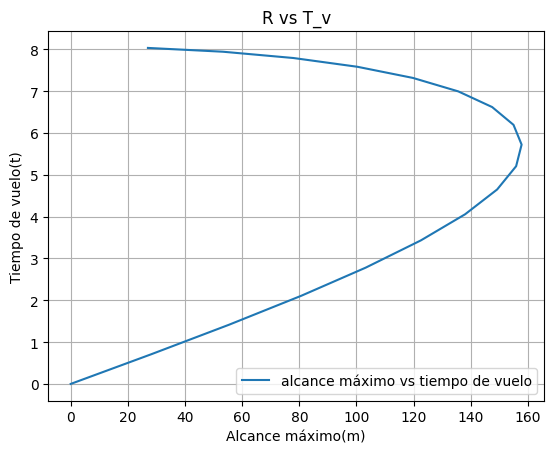

In [ ]:
#Gráfico de alcance máximo vs tiempo de vuelo
#No se incluyó el valor para el ángulo de 90°, para que quede mas bonita la gráfica :)
plt.plot(alcances[0:len(alcances) - 1],vuelito_new[0:len(alcances) - 1],label='alcance máximo vs tiempo de vuelo')
plt.xlabel('Alcance máximo(m)')
plt.ylabel('Tiempo de vuelo(t)')
plt.title('R vs T_v')
plt.grid()
plt.legend()

7.

<ipython-input-18-8e0dda7487de>:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


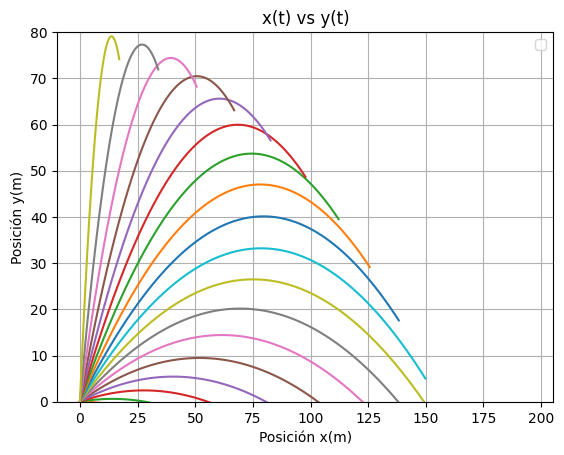

In [ ]:
#Posición para cada ángulo
#Me encantaría saber si esta bien o no, pero me resulta divertida la respuesta
t_nueva = np.linspace(0,5,100)
general_x = []
general_y = []
posicion_x_nueva = np.zeros(len(t_nueva))
posicion_y_nueva = np.zeros(len(t_nueva))
#Calculamos sus trayectrias
for i in range(len(new_v0_x)):

  general_x.append(posicion_x_nueva)
  general_y.append(posicion_y_nueva)

  posicion_x_nueva = np.zeros(len(t_nueva))
  posicion_y_nueva = np.zeros(len(t_nueva))

  for j in range(len(t_nueva)):

    posicion_x_nueva[j] = posicion_x(new_v0_x[i],b_new,t_nueva[j])
    posicion_y_nueva[j] = posicion_y(new_v0_y[i],b_new,g,t_nueva[j])

#Graficas para cada ángulo
for i in range(len(new_v0_x)):
  plt.plot(general_x[i],general_y[i])

plt.xlabel('Posición x(m)')
plt.ylabel('Posición y(m)')
plt.title('x(t) vs y(t)')
plt.ylim(0,80)
plt.grid()
plt.legend()